In [9]:
# Import necessary libraries
import json
import ast
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns


In [21]:
# %% Set a consistent Seaborn style and color palette
sns.set_theme(style="whitegrid")  # Options: "darkgrid", "white", "ticks"
custom_palette = sns.color_palette(
    "Blues_r"
)  # Reverse Blues palette for a unified look
sns.set_palette(custom_palette)

In [10]:
df = pd.read_csv("../data/sncb_data_challenge.csv", sep=";", index_col=0)
df

incident_id                                  vehicles_sequence  \
0         4432881  [609, 609, 609, 609, 609, 609, 609, 609, 609, ...   
1         4432943  [526, 526, 526, 526, 526, 526, 526, 526, 526, ...   
2         4432955  [592, 592, 592, 592, 592, 592, 592, 592, 592, ...   
3         4433021  [576, 576, 576, 576, 576, 576, 576, 576, 576, ...   
4         4433129  [634, 634, 634, 634, 634, 634, 634, 634, 634, ...   
...           ...                                                ...   
1006      4611953  [1016, 1016, 1016, 1016, 1016, 1016, 1016, 101...   
1007      4611991  [505, 505, 505, 505, 505, 505, 505, 505, 505, ...   
1008      4612137  [559, 559, 559, 559, 559, 559, 559, 559, 559, ...   
1009      4612321  [1011, 1011, 1011, 1011, 1011, 1011, 1011, 101...   
1010     44233933  [1017, 1017, 1017, 1017, 1017, 1017, 1017, 101...   

                                        events_sequence  \
0     [2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...   
1     [2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...   
2     [4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...   
3     [4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...   
4     [4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...   
...                                                 ...   
1006  [4002, 2852, 4110, 2854, 4026, 4092, 4094, 261...   
1007  [3490, 4068, 4068, 4068, 4068, 4068, 4068, 406...   
1008  [4066, 4066, 4066, 4068, 3658, 4066, 3658, 406...   
1009  [2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...   
1010  [4004, 4032, 4028, 2852, 4026, 4110, 2854, 409...   

                           seconds_to_incident_sequence  approx_lat  \
0     [-5510, -5510, -5507, -5507, -5506, -5506, -55...   50.876601   
1     [-8573, -8573, -8032, -8032, -8032, -7859, -61...   51.037435   
2     [-12291, -12291, -12291, -10932, -10932, -1091...   50.864083   
3     [-14351, -14204, -13890, -13383, -12739, -1243...   51.183220   
4     [-224, -224, -223, -222, -222, -222, -220, -22...   50.818727   
...                                                 ...         ...   
1006  [-13963, -13961, -13961, -13959, -13958, -1395...   50.159057   
1007  [-14384, -14347, -14229, -14060, -13941, -1383...   50.767118   
1008  [-14187, -13803, -13251, -12756, -12643, -1207...   51.164770   
1009  [-14400, -14337, -14335, -14307, -14296, -1427...   50.161550   
1010  [-11723, -11723, -11722, -11721, -11721, -1172...   50.405408   

      approx_lon                                 train_kph_sequence  \
0       4.718143  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1       4.431218  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...   
2       4.162115  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3       4.276025  [0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...   
4       3.253601  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...          ...                                                ...   
1006    5.972059  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1007    4.424321  [83.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.1, 0.3, 0.0,...   
1008    4.160534  [0.2, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, ...   
1009    4.976849  [116.4, 97.2, 96.9, 94.4, 95.3, 93.7, 94.3, 10...   
1010    4.852029  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   dj_ac_state_sequence  \
0     [False, False, False, False, False, False, Fal...   
1     [False, False, False, False, False, False, Fal...   
2     [False, False, False, False, False, False, Fal...   
3     [False, False, False, False, False, False, Fal...   
4     [False, False, False, False, False, False, Fal...   
...                                                 ...   
1006  [False, False, False, False, False, False, Fal...   
1007  [False, False, False, False, False, False, Fal...   
1008  [False, False, False, False, False, False, Fal...   
1009  [True, True, True, True, True, True, True, Tru...   
1010  [False, False, False, False, False, False, Fal...   

                 

### Data Preparation

In [11]:
# Data preprocessing function
def preprocess_data(df):
    """
    Preprocesses a DataFrame by applying transformations to specific columns.
    - Converts stringified sequences into Python lists of integers or floats.
    - Converts approximate latitude and longitude values into integers.
    - Converts boolean sequences into binary values (0 or 1).
    - Drops unnecessary columns after processing.

    Parameters:
    df (pd.DataFrame): The input DataFrame to be processed.

    Returns:
    pd.DataFrame: The processed DataFrame with transformed columns.
    """
    # Convert stringified sequences to lists of integers or floats using eval
    df["vehicles_sequence"] = df["vehicles_sequence"].apply(eval)
    df["events_sequence"] = df["events_sequence"].apply(eval)
    df["seconds_to_incident_sequence"] = df["seconds_to_incident_sequence"].apply(eval)
    df["train_kph_sequence"] = df["train_kph_sequence"].apply(eval)

    # Convert approx_lat and approx_lon to integers (handling potential NaN values)
    df["approx_lat"] = (
        pd.to_numeric(df["approx_lat"], errors="coerce").fillna(np.nan).astype(int)
    )
    df["approx_lon"] = (
        pd.to_numeric(df["approx_lon"], errors="coerce").fillna(np.nan).astype(int)
    )

    # Convert boolean sequences (represented as strings) into lists of 0s and 1s
    df["dj_ac_state_sequence"] = df["dj_ac_state_sequence"].apply(
        lambda x: [1 if val else 0 for val in eval(x)]
    )
    df["dj_dc_state_sequence"] = df["dj_dc_state_sequence"].apply(
        lambda x: [1 if val else 0 for val in eval(x)]
    )

    # Drop the approx_lat and approx_lon columns after processing
    df.drop(columns=["approx_lat", "approx_lon"])

    return df


# Function to process the 'seconds_to_incident_sequence' column
def process_seconds_sequence(data):
    """
    Processes the 'seconds_to_incident_sequence' column in a DataFrame by extracting numerical
    sequences, calculating summary statistics, and performing time gap analysis.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the 'seconds_to_incident_sequence' column.

    Returns:
    pd.DataFrame: The updated DataFrame with additional columns for summary statistics
                  and time gap analysis.
    """
    # Convert the 'seconds_to_incident_sequence' column from string format to lists of floats
    seconds_sequence = (
        data["seconds_to_incident_sequence"]
        .astype(str)
        .apply(
            lambda x: [float(i) for i in x.replace("[", "").replace("]", "").split(",")]
        )
    )

    # Calculate summary statistics for the sequences
    data["seconds_mean"] = seconds_sequence.apply(np.mean)
    data["seconds_std"] = seconds_sequence.apply(np.std)
    data["seconds_max"] = seconds_sequence.apply(np.max)
    data["seconds_min"] = seconds_sequence.apply(np.min)
    data["seconds_sum"] = seconds_sequence.apply(np.sum)

    # Perform time gap analysis by calculating differences between consecutive elements
    data["seconds_gap_mean"] = seconds_sequence.apply(
        lambda x: np.mean(np.diff(x)) if len(x) > 1 else 0
    )
    data["seconds_gap_std"] = seconds_sequence.apply(
        lambda x: np.std(np.diff(x)) if len(x) > 1 else 0
    )

    return data

# Feature engineering function
def feature_engineering(df):
    """
    Performs feature engineering on the input DataFrame by generating new features
    from existing columns related to vehicles, events, speed, and incident duration.
    Additional processing includes integrating statistical features and TF-IDF transformation.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing sequences and incident-related data.

    Returns:
    pd.DataFrame: The updated DataFrame with new engineered features and merged TF-IDF columns.
    """

    # Compute the total number of vehicles involved in each incident
    df["vehicle_count"] = df["vehicles_sequence"].apply(len)

    # Compute the number of unique vehicles involved in each incident
    df["vehicles_unique_count"] = df["vehicles_sequence"].apply(lambda x: len(set(x)))

    # Compute the total number of events associated with each incident
    df["event_count"] = df["events_sequence"].apply(len)

    # Compute the number of unique events associated with each incident
    df["events_unique_count"] = df["events_sequence"].apply(lambda x: len(set(x)))

    # Calculate the mean speed from the train's speed sequence
    df["mean_speed"] = df["train_kph_sequence"].apply(np.mean)

    # Calculate the total duration of the incident from the sequence of timestamps
    df["incident_duration"] = df["seconds_to_incident_sequence"].apply(
        lambda x: max(x) - min(x) if len(x) > 0 else 0
    )

    # Process the 'seconds_to_incident_sequence' column to extract statistical features
    df = process_seconds_sequence(df)

    # Calculate additional statistical features for the train's speed sequence
    df["max_speed"] = df["train_kph_sequence"].apply(np.max)
    df["min_speed"] = df["train_kph_sequence"].apply(np.min)
    df["std_speed"] = df["train_kph_sequence"].apply(np.std)

    # Calculate the average number of events per vehicle involved in the incident
    df["event_count_per_vehicle"] = df["event_count"] / df["vehicle_count"]

    # Calculate the average incident duration per vehicle involved
    df["incident_duration_per_vehicle"] = df["incident_duration"] / df["vehicle_count"]

    # Compute the difference between the maximum and minimum speed for incidents with multiple vehicles
    df["max_speed_diff"] = df.apply(
        lambda row: (
            np.max(row["train_kph_sequence"]) - np.min(row["train_kph_sequence"])
        )
        if len(row["vehicles_sequence"]) > 1
        else 0,
        axis=1,
    )

    return df


In [12]:
# Preprocess data
df = preprocess_data(df)
# Perform feature engineering
df = feature_engineering(df)
df

incident_id                                  vehicles_sequence  \
0         4432881  [609, 609, 609, 609, 609, 609, 609, 609, 609, ...   
1         4432943  [526, 526, 526, 526, 526, 526, 526, 526, 526, ...   
2         4432955  [592, 592, 592, 592, 592, 592, 592, 592, 592, ...   
3         4433021  [576, 576, 576, 576, 576, 576, 576, 576, 576, ...   
4         4433129  [634, 634, 634, 634, 634, 634, 634, 634, 634, ...   
...           ...                                                ...   
1006      4611953  [1016, 1016, 1016, 1016, 1016, 1016, 1016, 101...   
1007      4611991  [505, 505, 505, 505, 505, 505, 505, 505, 505, ...   
1008      4612137  [559, 559, 559, 559, 559, 559, 559, 559, 559, ...   
1009      4612321  [1011, 1011, 1011, 1011, 1011, 1011, 1011, 101...   
1010     44233933  [1017, 1017, 1017, 1017, 1017, 1017, 1017, 101...   

                                        events_sequence  \
0     [2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...   
1     [2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...   
2     [4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...   
3     [4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...   
4     [4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...   
...                                                 ...   
1006  [4002, 2852, 4110, 2854, 4026, 4092, 4094, 261...   
1007  [3490, 4068, 4068, 4068, 4068, 4068, 4068, 406...   
1008  [4066, 4066, 4066, 4068, 3658, 4066, 3658, 406...   
1009  [2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...   
1010  [4004, 4032, 4028, 2852, 4026, 4110, 2854, 409...   

                           seconds_to_incident_sequence  approx_lat  \
0     [-5510, -5510, -5507, -5507, -5506, -5506, -55...          50   
1     [-8573, -8573, -8032, -8032, -8032, -7859, -61...          51   
2     [-12291, -12291, -12291, -10932, -10932, -1091...          50   
3     [-14351, -14204, -13890, -13383, -12739, -1243...          51   
4     [-224, -224, -223, -222, -222, -222, -220, -22...          50   
...                                                 ...         ...   
1006  [-13963, -13961, -13961, -13959, -13958, -1395...          50   
1007  [-14384, -14347, -14229, -14060, -13941, -1383...          50   
1008  [-14187, -13803, -13251, -12756, -12643, -1207...          51   
1009  [-14400, -14337, -14335, -14307, -14296, -1427...          50   
1010  [-11723, -11723, -11722, -11721, -11721, -1172...          50   

      approx_lon                                 train_kph_sequence  \
0              4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1              4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...   
2              4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3              4  [0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...   
4              3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...          ...                                                ...   
1006           5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1007           4  [83.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.1, 0.3, 0.0,...   
1008           4  [0.2, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, ...   
1009           4  [116.4, 97.2, 96.9, 94.4, 95.3, 93.7, 94.3, 10...   
1010           4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   dj_ac_state_sequence  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1006  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1007  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1008  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1009  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1010  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                 

### Data Exploration

In [18]:
#  Summary stats

list_columns = [
    "vehicles_sequence",
    "events_sequence",
    "seconds_to_incident_sequence",
    "train_kph_sequence",
    "dj_ac_state_sequence",
    "dj_dc_state_sequence",
]

# Summary statistics for list lengths
print("\nSummary Statistics for Sequence Lengths:")
sequence_length_stats = df[list_columns].applymap(len).describe()

# Print the summary stats
print(sequence_length_stats)


Summary Statistics for Sequence Lengths:
       vehicles_sequence  events_sequence  seconds_to_incident_sequence  \
count        1011.000000      1011.000000                   1011.000000   
mean          553.197824       553.197824                    553.197824   
std           314.852092       314.852092                    314.852092   
min            10.000000        10.000000                     10.000000   
25%           307.500000       307.500000                    307.500000   
50%           554.000000       554.000000                    554.000000   
75%           746.000000       746.000000                    746.000000   
max          2407.000000      2407.000000                   2407.000000   

       train_kph_sequence  dj_ac_state_sequence  dj_dc_state_sequence  
count         1011.000000           1011.000000           1011.000000  
mean           553.197824            553.197824            553.197824  
std            314.852092            314.852092            314.852

/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_26702/4251693549.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sequence_length_stats = df[list_columns].applymap(len).describe()


Summary statistics for various sequences related to train operations and incidents. All sequences (vehicles, events, seconds to incident, train speed, and control states) contain 1,011 observations.

* average sequence length across all columns is 553.2 steps, with a standard deviation of 314.9, indicating significant variability in the lengths of these sequences

* sequence lengths range from a minimum of 10 steps to a maximum of 2407 steps  data captures both short and long event sequences

Quartile Distribution: 

*  25% of sequences have fewer than 308 steps 
*  50% (median) of sequences have around 554 steps
*  75% of sequences are longer than 746 steps!

/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_26702/352213652.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_26702/352213652.py:9: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


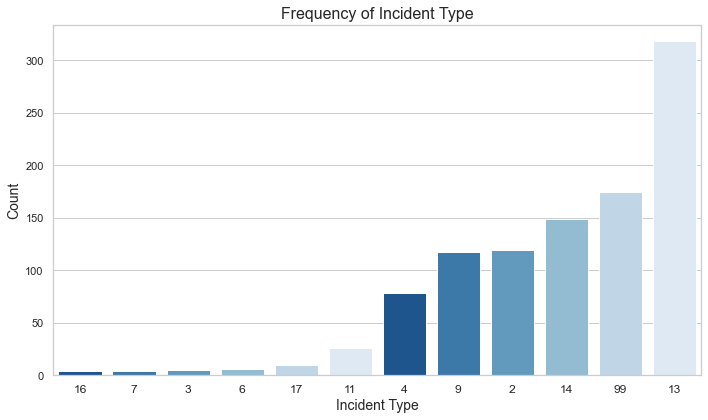

In [22]:
# %% Incident type analysis
incident_counts = df["incident_type"].value_counts()

# Sort the incident counts in descending order
incident_counts = incident_counts.sort_values(ascending=True)

# Plot the sorted incident counts
plt.figure(figsize=(10, 6))
sns.barplot(
    x=incident_counts.index,
    y=incident_counts.values,
    palette=custom_palette,
    order=incident_counts.index,
)
plt.title("Frequency of Incident Type", fontsize=16)
plt.xlabel("Incident Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

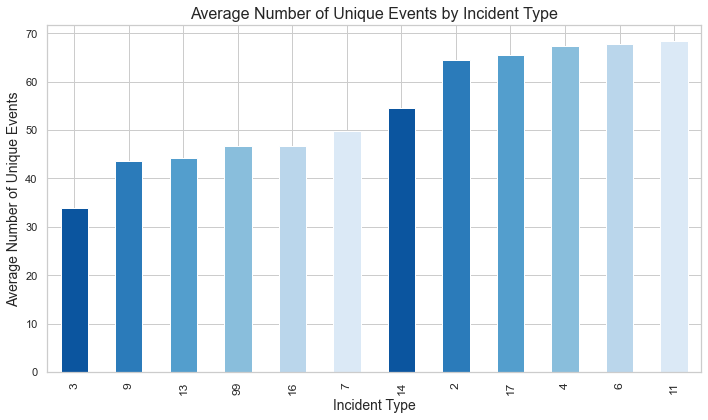

In [24]:
# %% Calculate the average number of unique events per incident type
def calculate_unique_events(seq):
    # Convert the sequence of events into a set to find unique events
    return len(set(seq))  # Returns the count of unique events


# Apply this function to the 'events_sequence' column for each incident type
average_unique_events = df.groupby("incident_type")["events_sequence"].apply(
    lambda x: np.mean([calculate_unique_events(seq) for seq in x])
)

# Plot the result
plt.figure(figsize=(10, 6))
average_unique_events.sort_values().plot(kind="bar", color=custom_palette)
plt.title("Average Number of Unique Events by Incident Type", fontsize=16)
plt.xlabel("Incident Type", fontsize=14)
plt.ylabel("Average Number of Unique Events", fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

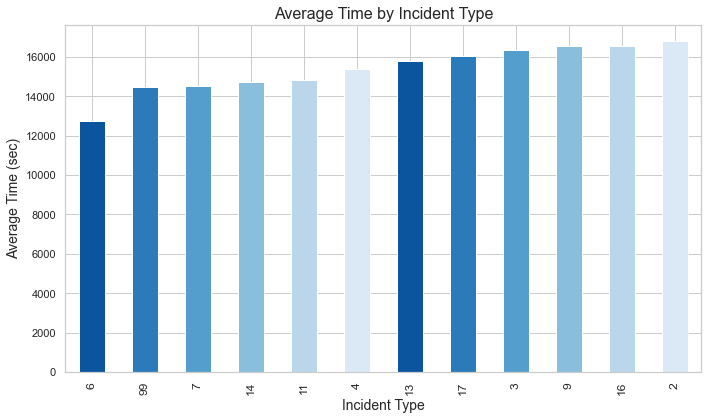

In [25]:
# %% Calculate average incident length based on time sequences
def calculate_incident_length(seq):
    # Calculate the incident length by subtracting min time from max time in the sequence
    return np.max(seq) - np.min(seq)


# Calculate the incident length for each incident type
incident_lengths = df.groupby("incident_type")["seconds_to_incident_sequence"].apply(
    lambda x: np.mean([calculate_incident_length(seq) for seq in x])
)

plt.figure(figsize=(10, 6))
incident_lengths.sort_values().plot(kind="bar", color=custom_palette)
plt.title("Average Time by Incident Type", fontsize=16)
plt.xlabel("Incident Type", fontsize=14)
plt.ylabel("Average Time (sec)", fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

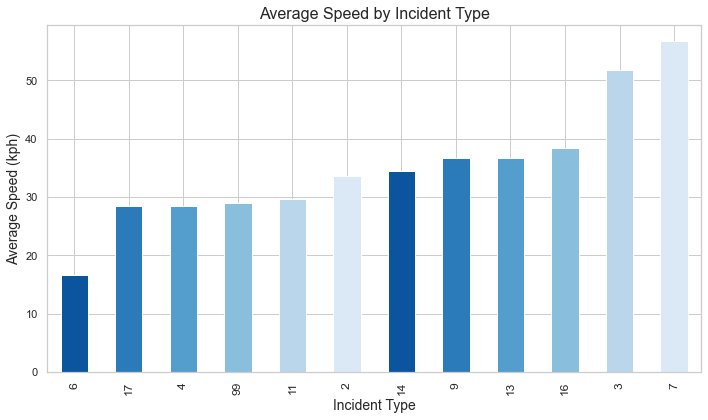

In [27]:
# %% Explore relationship between average speed and incident type
average_speed_by_incident = df.groupby("incident_type")["train_kph_sequence"].apply(
    lambda x: np.mean([np.mean(seq) for seq in x])
)

plt.figure(figsize=(10, 6))
average_speed_by_incident.sort_values().plot(kind="bar", color=custom_palette)
plt.title("Average Speed by Incident Type", fontsize=16)
plt.xlabel("Incident Type", fontsize=14)
plt.ylabel("Average Speed (kph)", fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

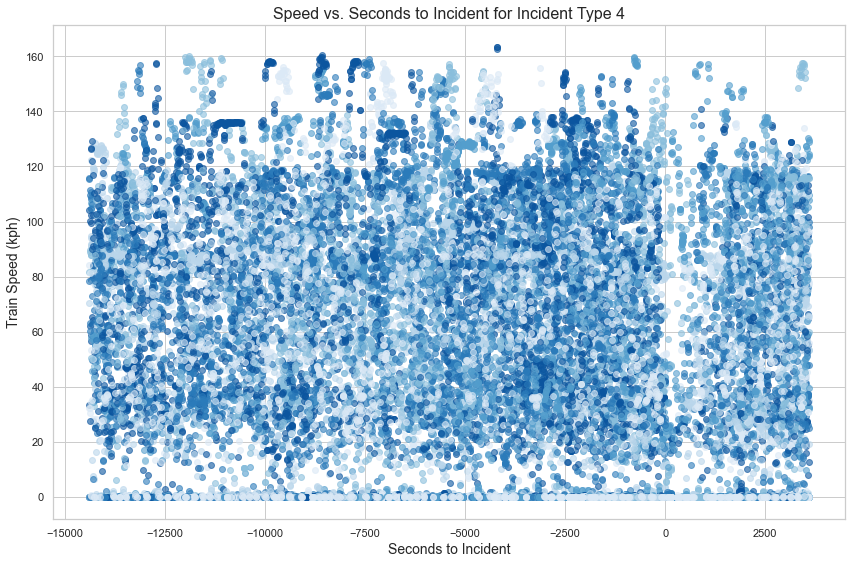

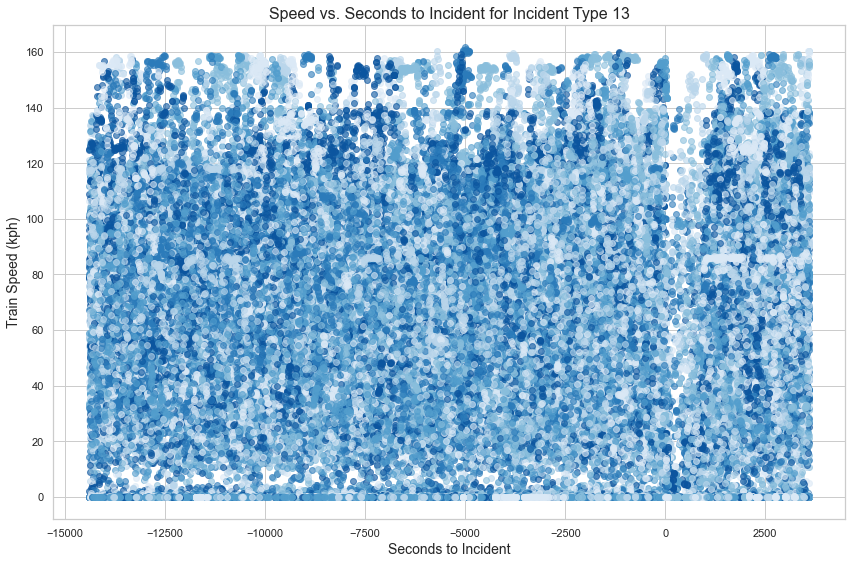

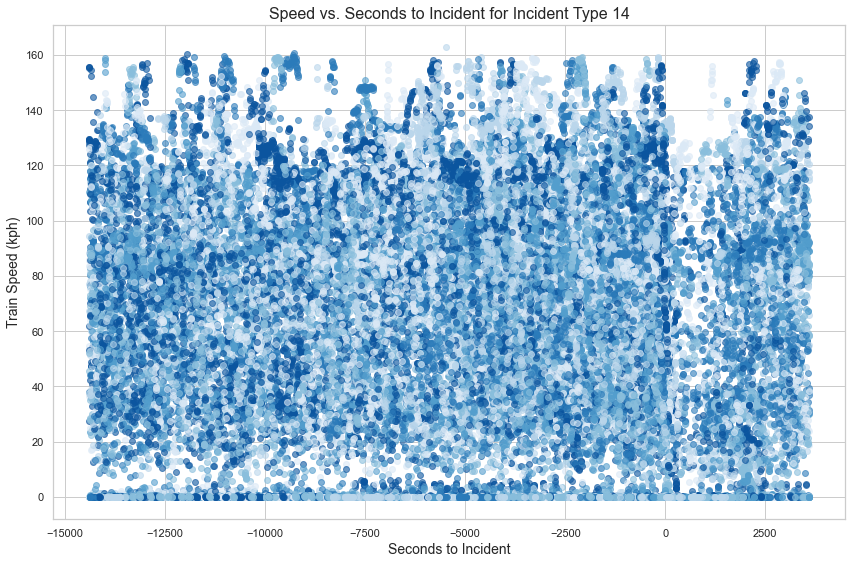

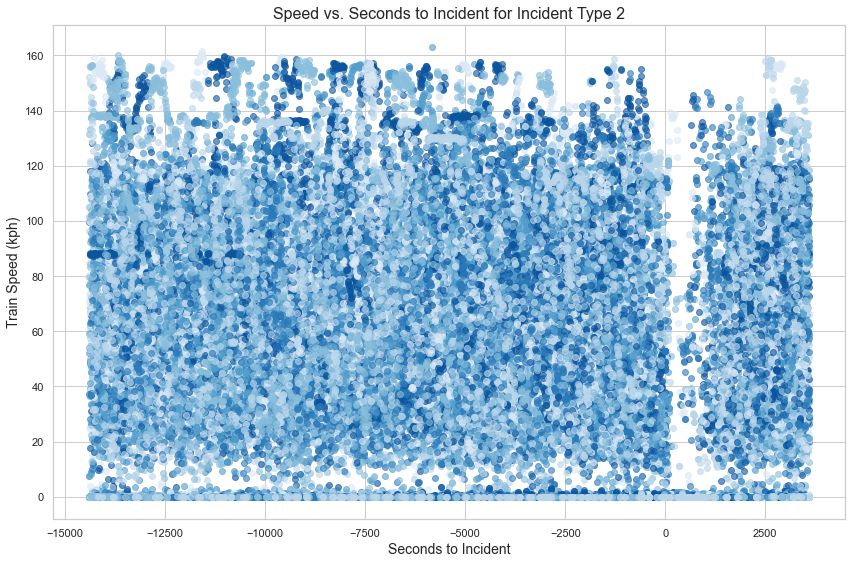

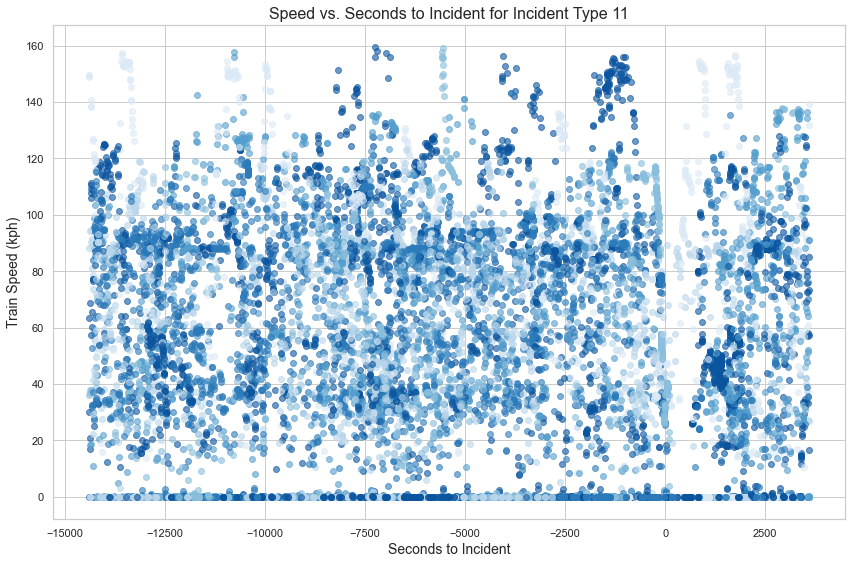

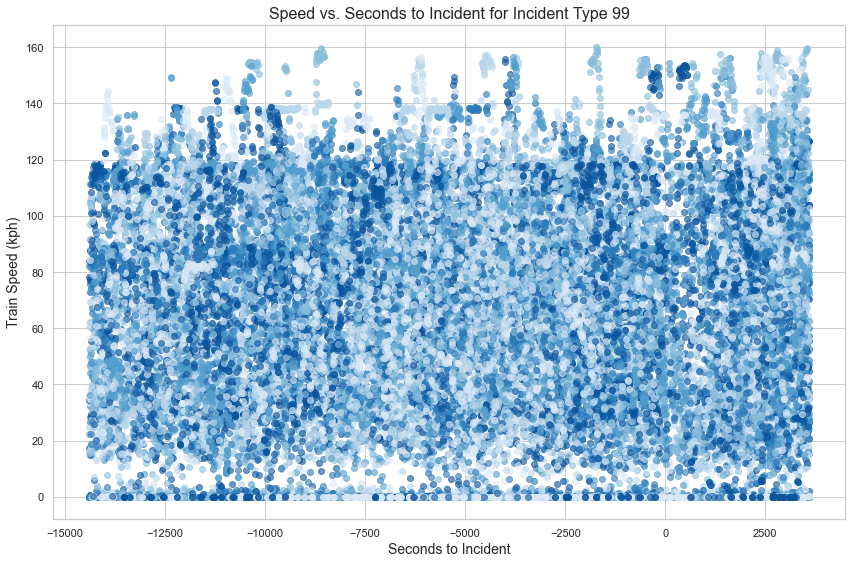

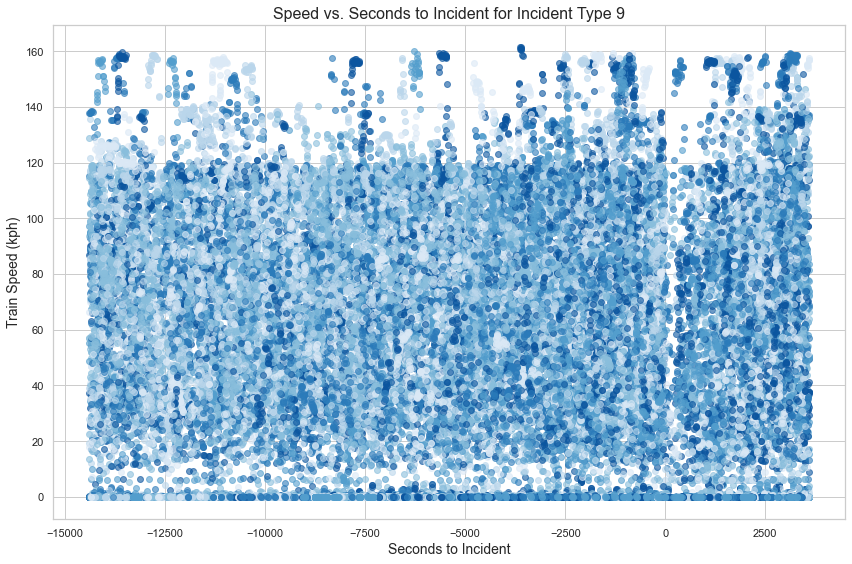

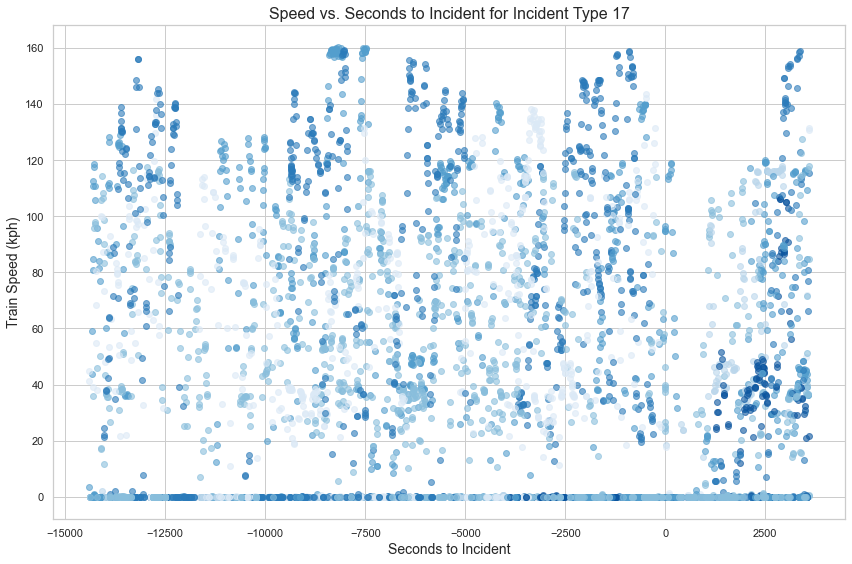

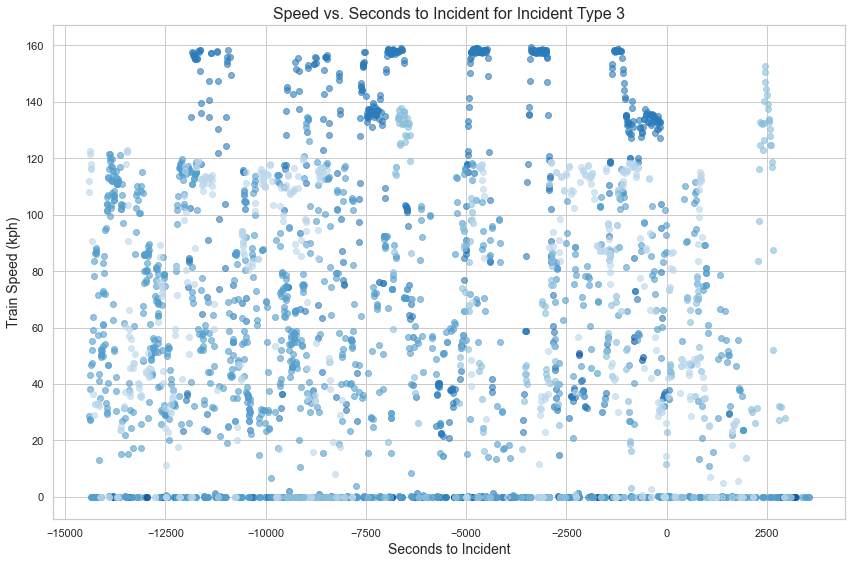

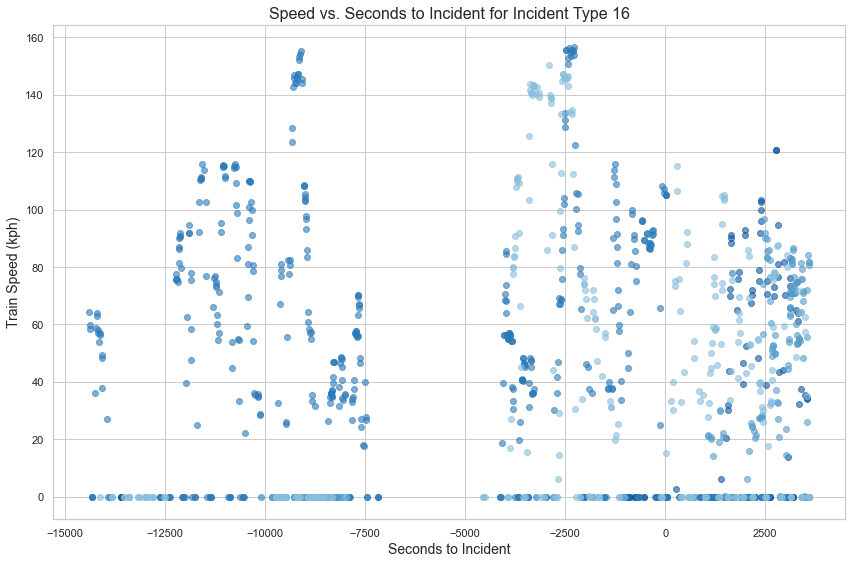

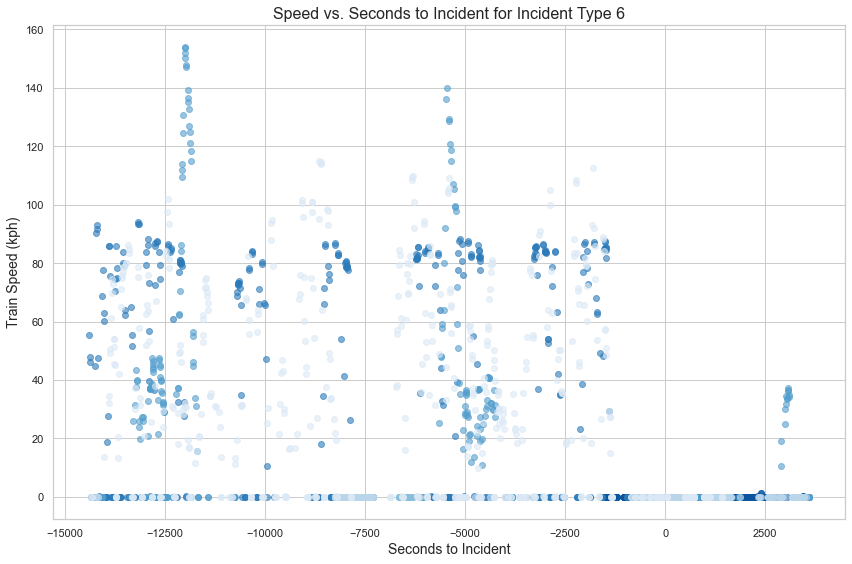

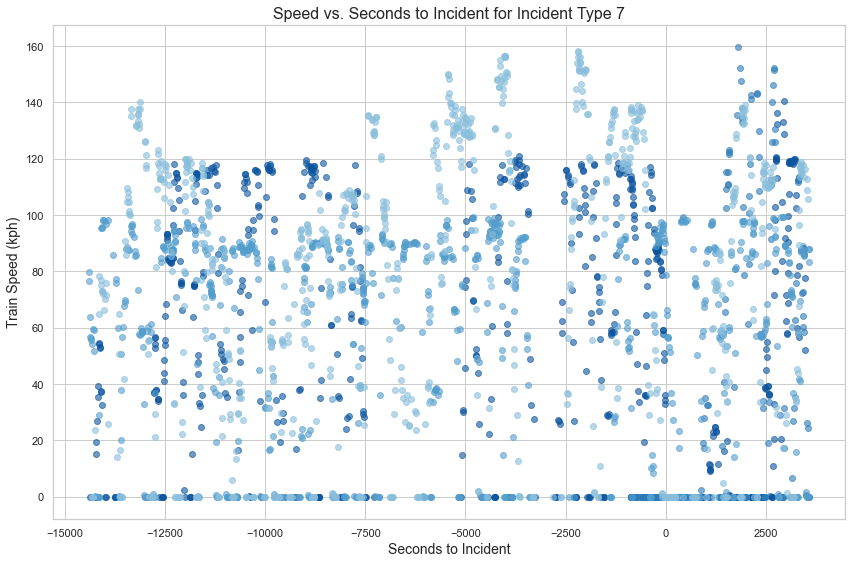

In [29]:
# %% Iterate over each unique incident type

unique_incident_types = df["incident_type"].unique()
# Loop through each incident type
for incident_type in unique_incident_types:
    plt.figure(figsize=(12, 8))

    # Filter rows for the current incident type
    subset = df[df["incident_type"] == incident_type]

    # Plot the relationship for each row
    for idx, row in subset.iterrows():
        plt.scatter(
            row["seconds_to_incident_sequence"],
            row["train_kph_sequence"],
            alpha=0.6,
            label=f"Row {idx}",
        )

    # Add plot details
    plt.title(
        f"Speed vs. Seconds to Incident for Incident Type {incident_type}", fontsize=16
    )
    plt.xlabel("Seconds to Incident", fontsize=14)
    plt.ylabel("Train Speed (kph)", fontsize=14)
    plt.tight_layout()

    # Optionally, you can show the plot
    plt.show()

    # Close the figure to avoid overlapping with the next plot
    plt.close()

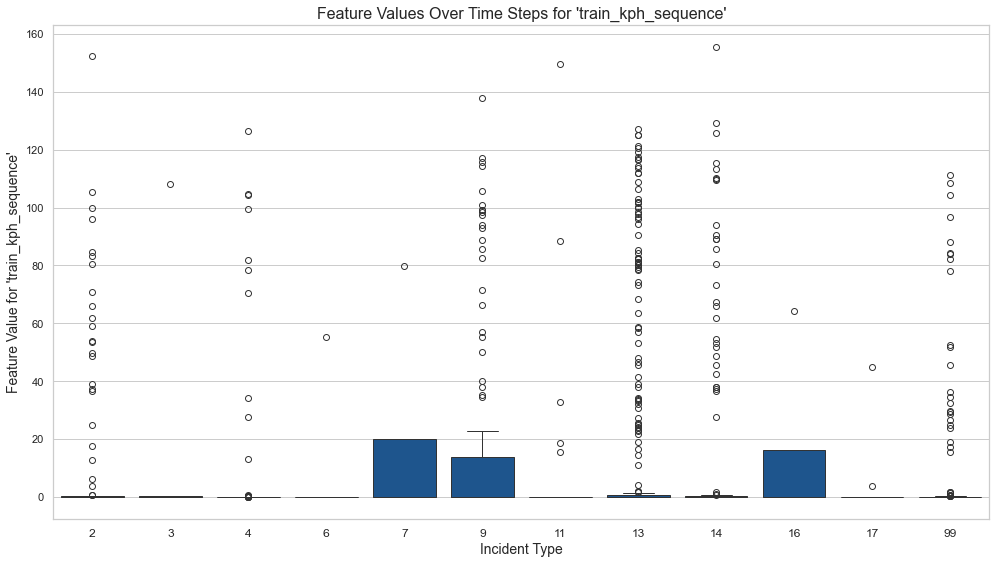

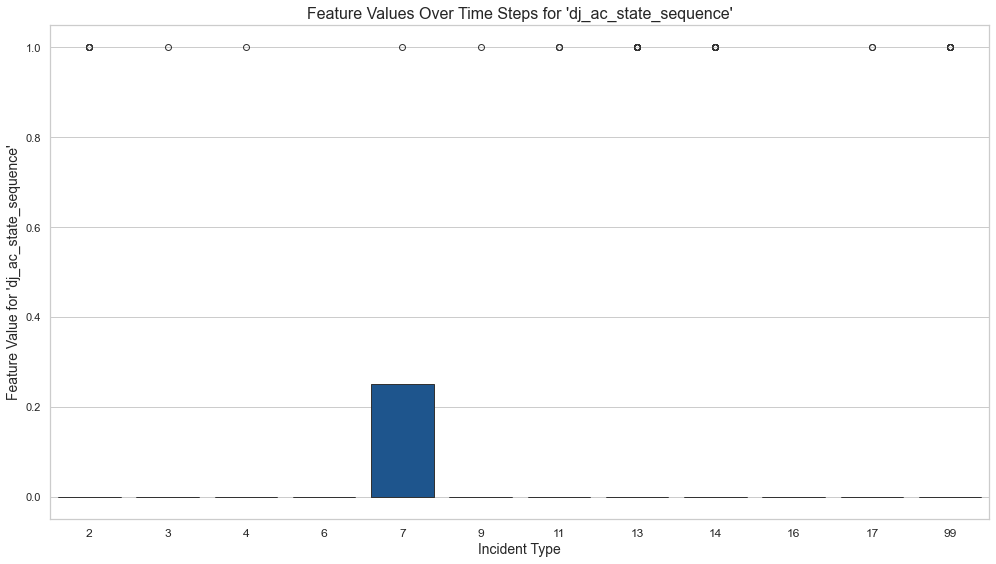

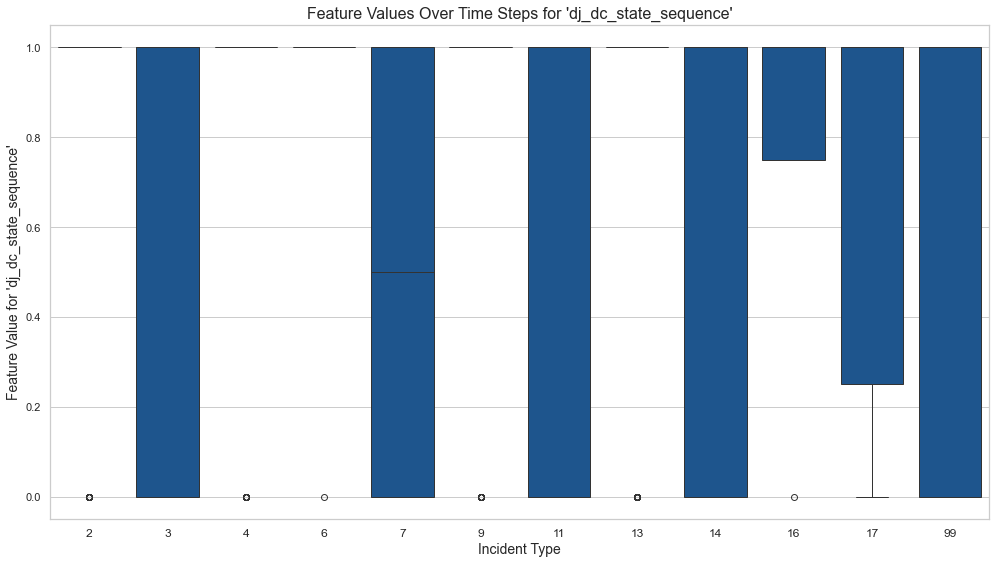

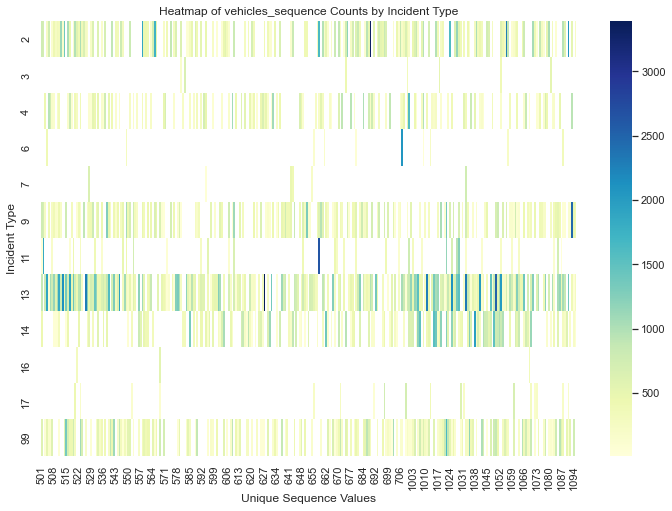

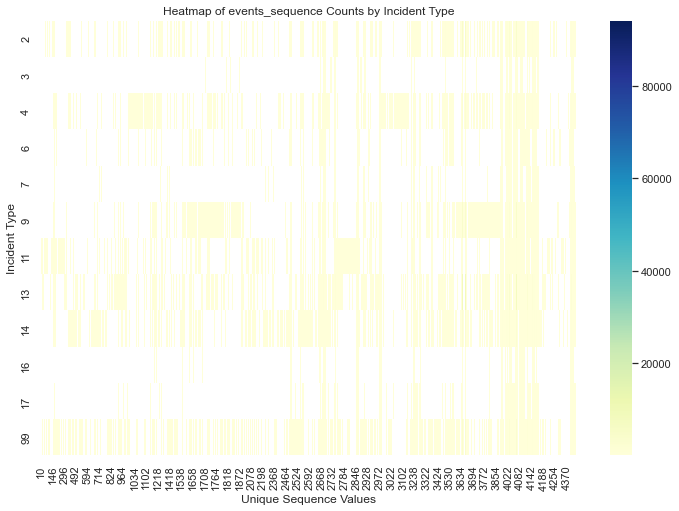

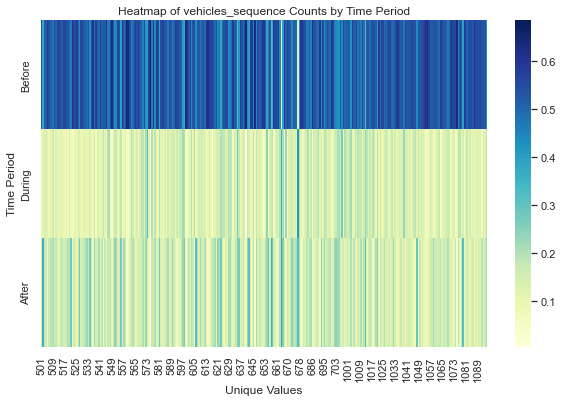

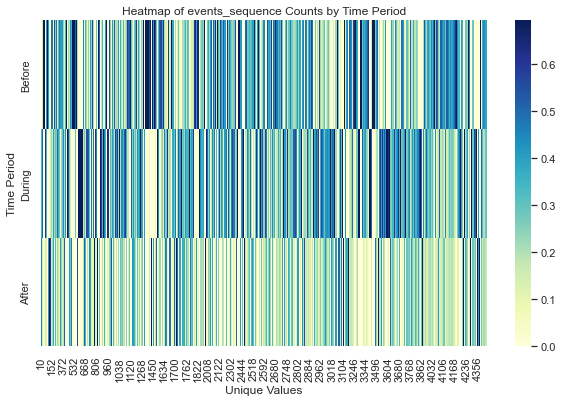

In [37]:
# %% Choose all time steps


# Function to plot boxplots for each feature at each time step
def plot_feature_boxplots(data, feature):
    plt.figure(figsize=(14, 8))

    # Extract the values for the feature at each time step
    time_step_values = []
    for _, row in data.iterrows():
        if len(row[feature]) > 0:
            time_step_values.append(
                row[feature]
            )  # Collect all sequences for the feature
        else:
            time_step_values.append(
                [np.nan] * len(row[feature])
            )  # Handle empty sequences if necessary

    # Convert the list of sequences to a DataFrame for plotting
    time_step_values_df = pd.DataFrame(time_step_values)
    time_step_values_df["incident_type"] = data[
        "incident_type"
    ]  # Add the incident_type column

    # Plot the boxplot
    sns.boxplot(
        x="incident_type", y=time_step_values_df.columns[0], data=time_step_values_df
    )

    # Add titles and labels
    plt.title(f"Feature Values Over Time Steps for '{feature}'", fontsize=16)
    plt.xlabel("Incident Type", fontsize=14)
    plt.ylabel(f"Feature Value for '{feature}'", fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()


# Plot boxplots for each feature
plot_feature_boxplots(df, "train_kph_sequence")
plot_feature_boxplots(df, "dj_ac_state_sequence")
plot_feature_boxplots(df, "dj_dc_state_sequence")


# Function to count unique values for each incident type
def count_unique_values_by_incident_type(data, sequence_col, incident_col):
    # Group the data by incident type
    grouped_data = data.groupby(incident_col)

    # Dictionary to store counts for each incident type
    incident_type_counts = {}

    # Iterate through each group (incident type)
    for incident_type, group in grouped_data:
        # Flatten the sequence for each incident type
        all_values = [item for sublist in group[sequence_col] for item in sublist]

        # Count the occurrences of each unique value in the sequence
        value_counts = pd.Series(all_values).value_counts()

        # Store the value counts for each incident type
        incident_type_counts[incident_type] = value_counts

    return incident_type_counts


# Function to create a single heatmap for each sequence column
def create_single_heatmap(data, sequence_col, incident_col):
    # Count the occurrences of each unique value for each incident type
    incident_type_counts = count_unique_values_by_incident_type(
        data, sequence_col, incident_col
    )

    # Create a DataFrame for the heatmap
    # Each row will represent an incident type, and each column will represent a unique value in the sequence
    heatmap_df = pd.DataFrame(
        incident_type_counts
    ).T  # Transpose to make it suitable for a heatmap

    # Sort the DataFrame to make it easier to visualize
    heatmap_df = heatmap_df.sort_index(
        axis=1, ascending=True
    )  # Sort columns by the sequence values

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_df, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap of {sequence_col} Counts by Incident Type")
    plt.xlabel("Unique Sequence Values")
    plt.ylabel("Incident Type")

    # Save the heatmap as an image
    plt.show()
    plt.close()  # Close the plot to avoid displaying it after saving


# Create heatmap for vehicles_sequence
create_single_heatmap(df, "vehicles_sequence", "incident_type")

# Create heatmap for events_sequence
create_single_heatmap(df, "events_sequence", "incident_type")


# Function to split sequences based on time periods
def split_by_time_period(data, sequence_col, time_col):
    # Define time periods based on seconds_to_incident_sequence
    before, during, after = [], [], []

    for _, row in data.iterrows():
        sequence = row[sequence_col]
        time_sequence = row[time_col]

        for seq, time in zip(sequence, time_sequence):
            if time < -1000:  # Before the incident
                before.append(seq)
            elif -1000 <= time <= 1000:  # During the incident
                during.append(seq)
            else:  # After the incident
                after.append(seq)

    return before, during, after


# Function to create a heatmap from the sequence data with normalization and logarithmic scale
def create_heatmap(
    data, sequence_col, time_col, normalize=False, log_scale=False, min_threshold=1
):
    # Split the sequence into before, during, and after
    before, during, after = split_by_time_period(data, sequence_col, time_col)

    # Count the occurrences of each unique value in the sequences
    before_counts = pd.Series(before).value_counts()
    during_counts = pd.Series(during).value_counts()
    after_counts = pd.Series(after).value_counts()

    # Create a DataFrame for the heatmap
    heatmap_df = pd.DataFrame(
        {"Before": before_counts, "During": during_counts, "After": after_counts}
    ).fillna(0)  # Fill NaN values with 0

    # Apply minimum threshold (optional)
    heatmap_df = heatmap_df[heatmap_df.sum(axis=1) >= min_threshold]

    # Normalize the counts (optional)
    if normalize:
        # Convert the sum to a 2D numpy array (we use np.newaxis)
        row_sums = heatmap_df.sum(axis=1).values[
            :, np.newaxis
        ]  # Convert to a 2D numpy array
        heatmap_df = heatmap_df / row_sums  # Broadcast division by row sums

    # Apply logarithmic scale (optional)
    if log_scale:
        heatmap_df = np.log1p(
            heatmap_df
        )  # Apply log scale (log(1 + x) to avoid log(0))

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df.T, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap of {sequence_col} Counts by Time Period")
    plt.xlabel("Unique Values")
    plt.ylabel("Time Period")
    plt.show()


# Create heatmap for vehicles_sequence with normalization and log scale
create_heatmap(
    df,
    "vehicles_sequence",
    "seconds_to_incident_sequence",
    normalize=True,
    log_scale=True,
)

# Create heatmap for events_sequence with normalization and log scale
create_heatmap(
    df,
    "events_sequence",
    "seconds_to_incident_sequence",
    normalize=True,
    log_scale=True,
)

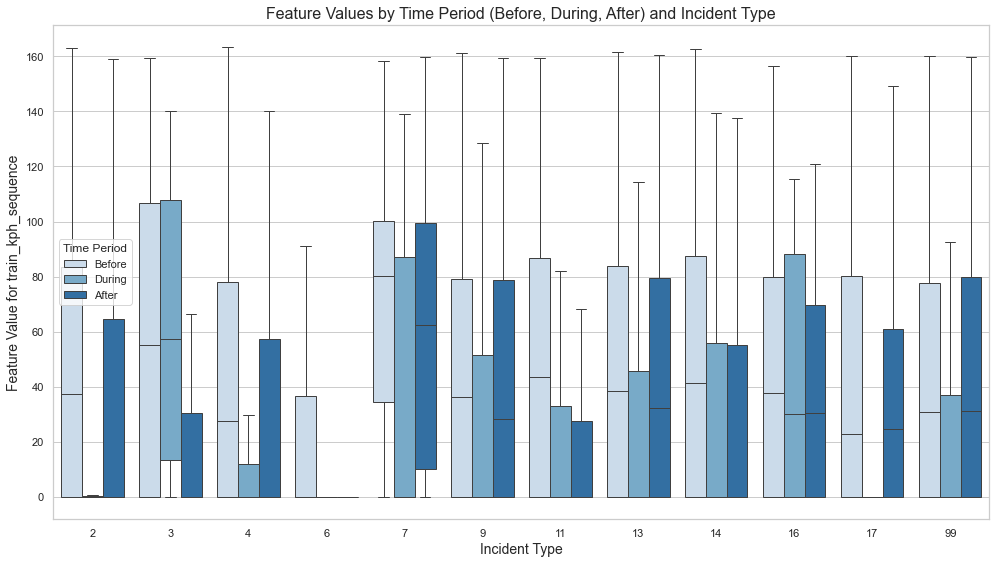

In [40]:
# Function to plot boxplots for 'before', 'during', and 'after' time periods
def plot_feature_boxplots_by_time_period(data, feature):
    # Initialize the plot
    plt.figure(figsize=(14, 8))

    # Initialize lists to store the feature values and their corresponding time period
    feature_values = []
    time_periods = []
    incident_types = []

    # Loop through the data and categorize based on time
    for _, row in data.iterrows():
        if feature == "train_kph_sequence":
            feature_sequence = row["train_kph_sequence"]
        elif feature == "dj_ac_state_sequence":
            feature_sequence = row["dj_ac_state_sequence"]
        elif feature == "dj_dc_state_sequence":
            feature_sequence = row["dj_dc_state_sequence"]
        else:
            continue  # Skip if the feature is not one of these

        # Categorize data into 'before', 'during', and 'after'
        for time, feature_value in zip(
            row["seconds_to_incident_sequence"], feature_sequence
        ):
            if time < -1000:  # Before the incident
                feature_values.append(feature_value)
                time_periods.append("Before")
                incident_types.append(row["incident_type"])
            elif -1000 <= time <= 1000:  # During the incident
                feature_values.append(feature_value)
                time_periods.append("During")
                incident_types.append(row["incident_type"])
            elif time > 1000:  # After the incident
                feature_values.append(feature_value)
                time_periods.append("After")
                incident_types.append(row["incident_type"])

    # Create a DataFrame for plotting
    feature_values_df = pd.DataFrame(
        {
            feature: feature_values,
            "Time Period": time_periods,
            "incident_type": incident_types,
        }
    )

    # Plot the boxplot
    sns.boxplot(
        x="incident_type",
        y=feature,
        hue="Time Period",
        data=feature_values_df,
        palette="Blues", showfliers=False
    )

    # Add plot details
    plt.title(
        "Feature Values by Time Period (Before, During, After) and Incident Type",
        fontsize=16,
    )
    plt.xlabel("Incident Type", fontsize=14)
    plt.ylabel(f"Feature Value for {feature}", fontsize=14)
    plt.tight_layout()

    # Show the plot
    plt.show()


# Plot the boxplots for 'vehicles_sequence', 'events_sequence', and 'train_kph_sequence' based on time periods
plot_feature_boxplots_by_time_period(df, "train_kph_sequence")


#### How does the speed of vehicles affect the likelihood of incidents?​

/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_26702/4096466372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_data['incident_type'] = speed_data['incident_type'].astype('category')
/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_26702/4096466372.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_data[['mean_speed', 'max_speed', 'std_speed']] = speed_data[


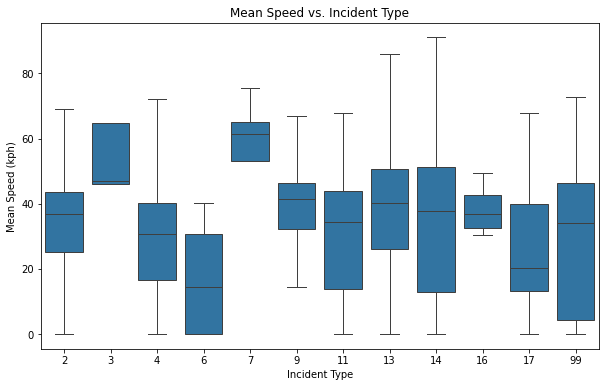

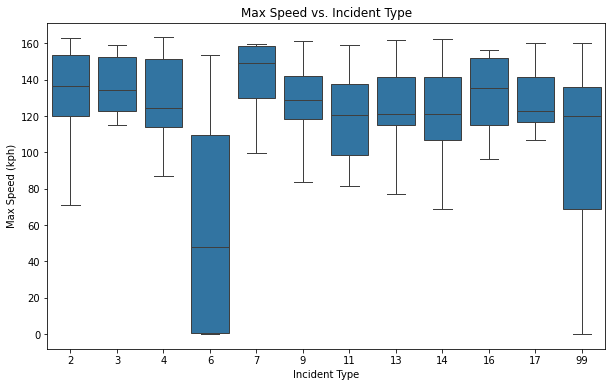

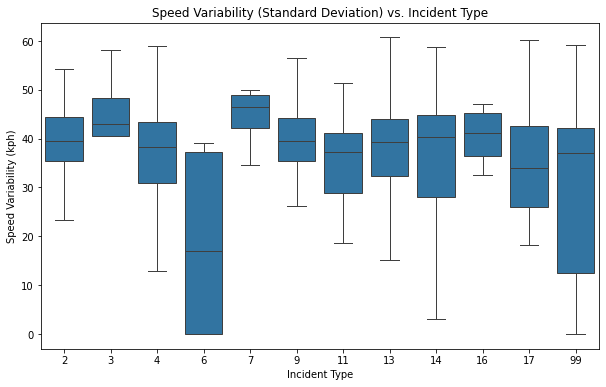

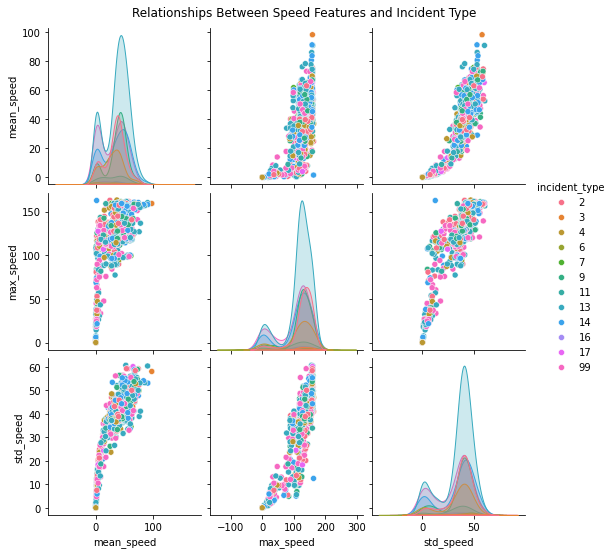

In [15]:
# Selecting relevant columns for the analysis
columns_of_interest = ['incident_type', 'mean_speed', 'max_speed', 'std_speed']
speed_data = df[columns_of_interest]

# Convert 'incident_type' to a categorical type for better analysis
speed_data['incident_type'] = speed_data['incident_type'].astype('category')

# Checking for non-numeric values in the numeric columns
speed_data[['mean_speed', 'max_speed', 'std_speed']] = speed_data[
    ['mean_speed', 'max_speed', 'std_speed']
].apply(pd.to_numeric, errors='coerce')

speed_data = speed_data.dropna()


# Scatterplot for mean speed vs. incident type
plt.figure(figsize=(10, 6))
# sns.stripplot(x='incident_type', y='mean_speed', data=speed_data, jitter=True, alpha=0.7)
sns.boxplot(x='incident_type', y='mean_speed', data=speed_data, whis=1.5, showfliers=False)
plt.title("Mean Speed vs. Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Mean Speed (kph)")
plt.show()

# Scatterplot for max speed vs. incident type
plt.figure(figsize=(10, 6))
# sns.stripplot(x='incident_type', y='max_speed', data=speed_data, jitter=True, alpha=0.7)
sns.boxplot(x='incident_type', y='max_speed', data=speed_data, whis=1.5, showfliers=False)
plt.title("Max Speed vs. Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Max Speed (kph)")
plt.show()

# Scatterplot for standard deviation of speed vs. incident type
plt.figure(figsize=(10, 6))
# sns.stripplot(x='incident_type', y='std_speed', data=speed_data, jitter=True, alpha=0.7)
sns.boxplot(x='incident_type', y='std_speed', data=speed_data, whis=1.5, showfliers=False)
plt.title("Speed Variability (Standard Deviation) vs. Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Speed Variability (kph)")
plt.show()

# 4. Pairplot to see overall relationships
sns.pairplot(speed_data, hue='incident_type', diag_kind='kde', height=2.5)
plt.suptitle("Relationships Between Speed Features and Incident Type", y=1.02)
plt.show()

#### What is average time difference between events of each incident type?​

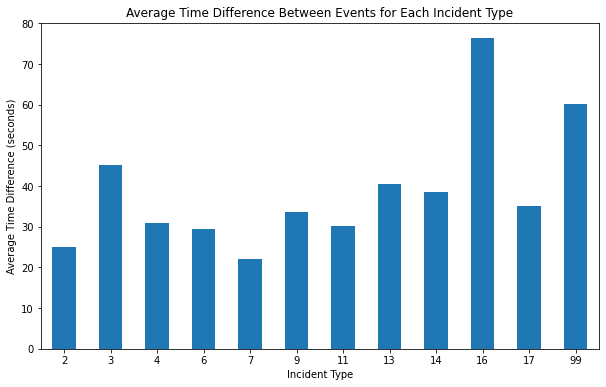

incident_type  Average Time Difference (seconds)
0               2                          25.012424
1               3                          45.074736
2               4                          30.808653
3               6                          29.344819
4               7                          22.183201
5               9                          33.607823
6              11                          30.163756
7              13                          40.469500
8              14                          38.655866
9              16                          76.362037
10             17                          35.080679
11             99                          60.200279

In [16]:
# Extracting the relevant columns for analysis
time_difference_columns = ['incident_type', 'seconds_gap_mean']

# Selecting and grouping the data by incident type
time_difference_data = df[time_difference_columns]
average_time_difference = time_difference_data.groupby('incident_type')['seconds_gap_mean'].mean()

# Visualizing the average time difference for each incident type
plt.figure(figsize=(10, 6))
average_time_difference.plot(kind='bar')
plt.title("Average Time Difference Between Events for Each Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Average Time Difference (seconds)")
plt.xticks(rotation=0)
plt.show()

# Displaying the average time difference values
average_time_difference.reset_index(name='Average Time Difference (seconds)')